## Decision Tree - Regression

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (9,5)
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows", 20)
pd.set_option("display.max_columns", 20)
pd.set_option("display.width", 20)

In [31]:
df=pd.read_csv("/Users/onurhanaydin/Desktop/Data Science/Dersler/Machine Learning/car_dataset.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [32]:
df.shape

(301, 9)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [34]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


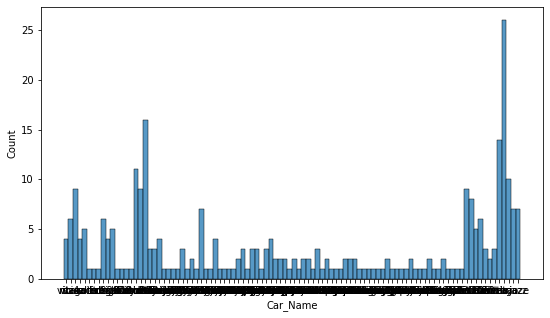

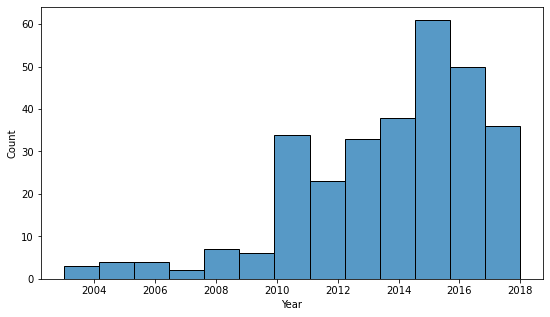

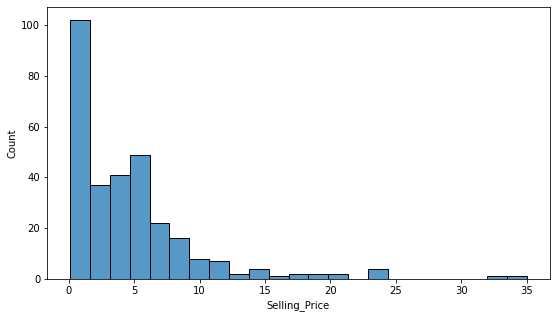

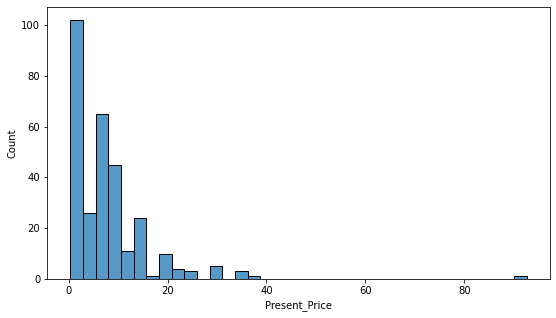

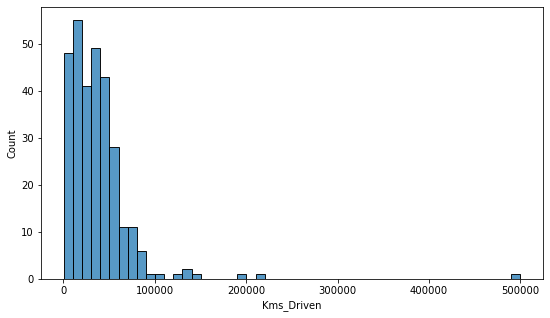

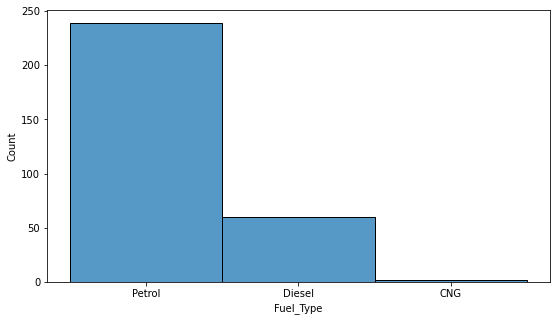

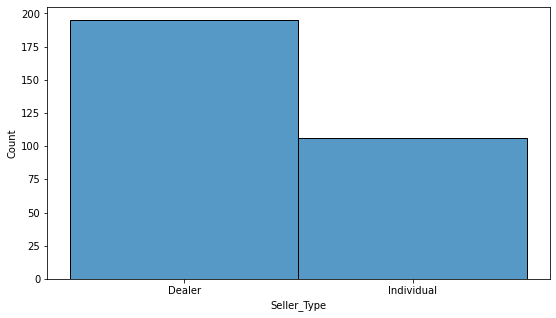

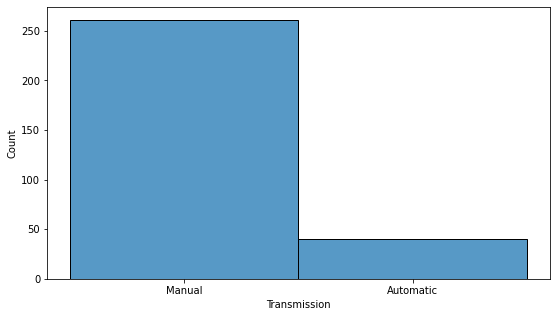

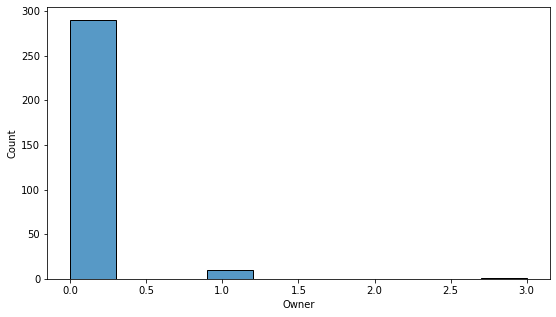

In [36]:
for i,col in enumerate(df.columns):
    plt.figure(i)
    sns.histplot(df[col])

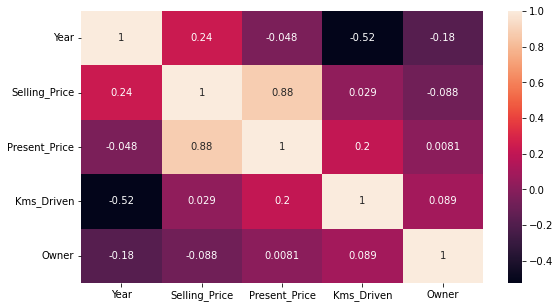

In [37]:
sns.heatmap(df.corr(), annot=True)
plt.show();

In [38]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [39]:
df["vehicle_age"]=2021-df.Year

In [41]:
df.Car_Name.value_counts()

city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: Car_Name, Length: 98, dtype: int64

In [42]:
# Since we use dummy, we drop "Car_Name" and "Year"
df.drop(columns=["Car_Name","Year"], inplace=True)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [43]:
df=pd.get_dummies(df, drop_first=True)

In [44]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,vehicle_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


## Train test split

In [45]:
X=df.drop("Selling_Price", axis=1)
y=df.Selling_Price

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=5)

print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)


Train features shape :  (240, 8)
Train target shape   :  (240,)
Test features shape  :  (61, 8)
Test target shape    :  (61,)


## Modeling

In [47]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [48]:
DT_model = DecisionTreeRegressor(random_state=101)

In [49]:
DT_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=101)

In [50]:
y_pred = DT_model.predict(X_test)
y_train_pred = DT_model.predict(X_train)

In [51]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [52]:
def train_val(y_train, y_train_pred, y_test, y_pred):
    
    scores = {"train_set": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test_set": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [53]:
train_val(y_train, y_train_pred, y_test, y_pred)

,train_set,test_set
R2,1.0,0.942589
mae,0.0,0.704754
mse,0.0,1.540966
rmse,0.0,1.241356


In [54]:
from sklearn.model_selection import cross_validate, cross_val_score
model = DecisionTreeRegressor(random_state=101)
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =5)
pd.DataFrame(scores)

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
0,0.008798,0.006678,0.871776,-0.819792,-1.458148,-1.207538
1,0.005734,0.005740,0.931908,-0.707500,-1.622442,-1.273751
2,0.005637,0.008599,0.747815,-1.015417,-6.228746,-2.495746
3,0.008033,0.006986,0.898099,-1.001875,-3.553990,-1.885203
4,0.007902,0.005014,0.957551,-0.597292,-1.367460,-1.169385


In [55]:
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                             0.881430
test_neg_mean_absolute_error       -0.828375
test_neg_mean_squared_error        -2.846157
test_neg_root_mean_squared_error   -1.606324
dtype: float64

In [56]:
train_val(y_train, y_train_pred, y_test, y_pred)

,train_set,test_set
R2,1.0,0.942589
mae,0.0,0.704754
mse,0.0,1.540966
rmse,0.0,1.241356


In [59]:
DT_model.feature_importances_

array([8.97152719e-01, 1.76820219e-02, 0.00000000e+00, 8.10505631e-02,
       6.15555338e-04, 1.58965401e-03, 1.03684467e-04, 1.80580261e-03])

In [61]:
df_f_i=pd.DataFrame(index=X.columns, data=DT_model.feature_importances_, 
                    columns=["Feature Importance"]).sort_values("Feature Importance")

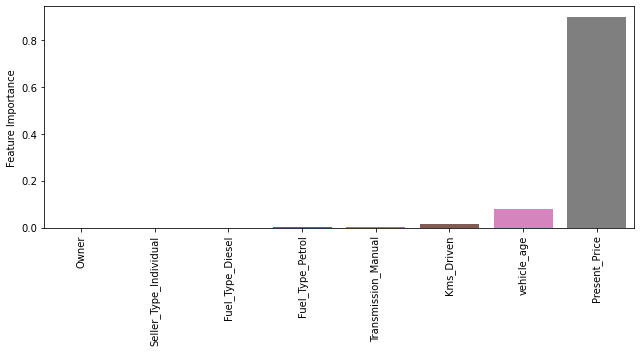

In [62]:
sns.barplot(x=df_f_i.index, y="Feature Importance", data=df_f_i)
plt.xticks(rotation=90)
plt.tight_layout();

## Visualizing trees

In [63]:
from sklearn.tree import plot_tree

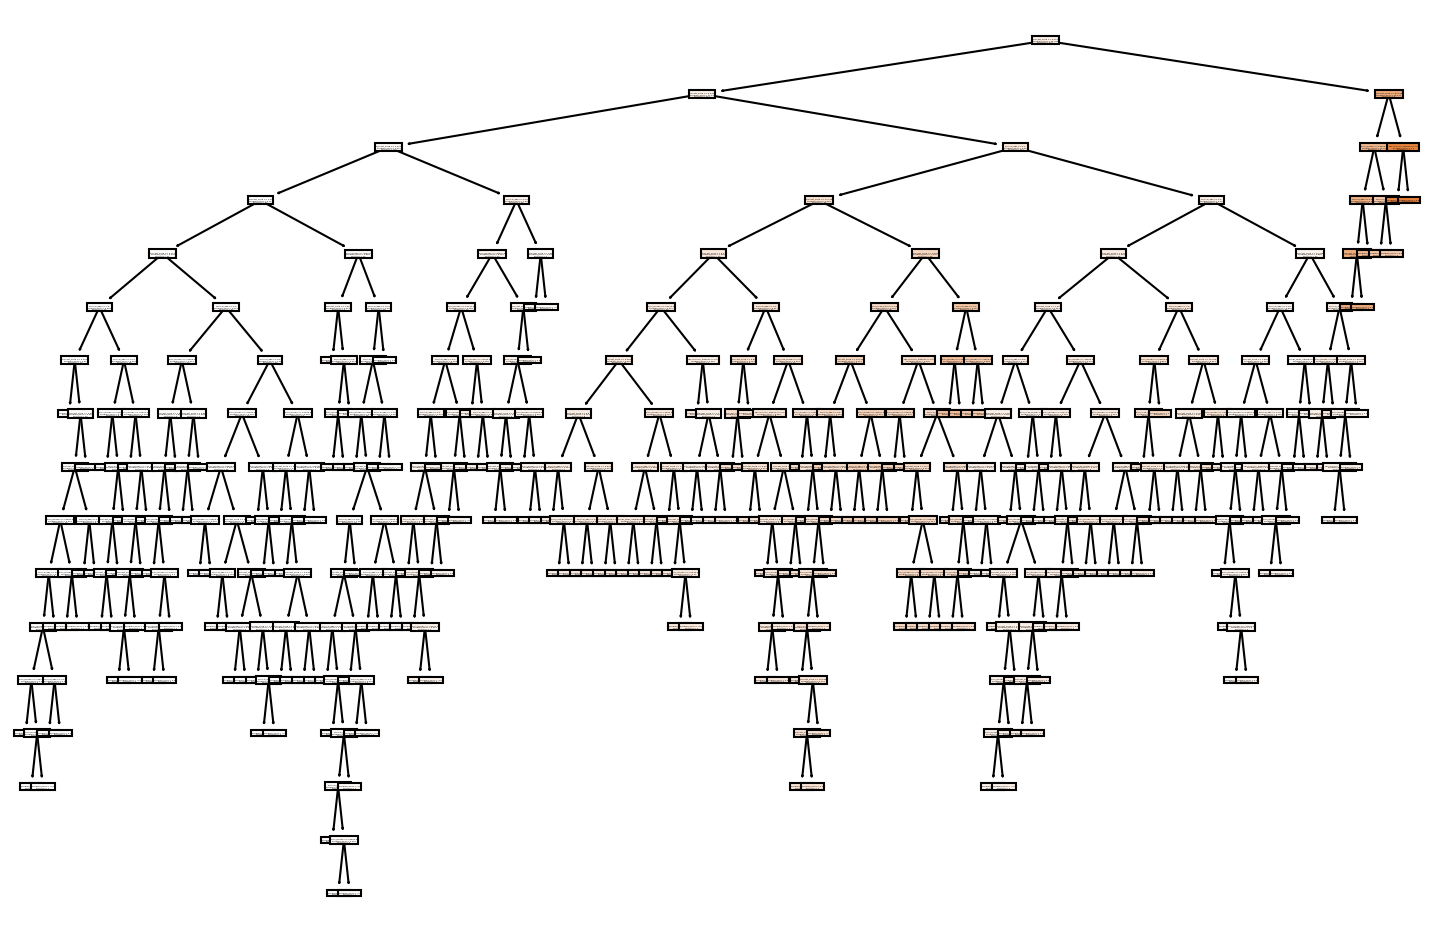

In [58]:
plt.figure(figsize=(12,8),dpi=150)
plot_tree(DT_model, filled=True, feature_names=X.columns);

In [72]:
def report_model(model):
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    print('\n')
    print(train_val(y_train, y_train_pred, y_test, y_pred))
    print('\n')
    plt.figure(figsize=(12,8),dpi=300)
    plot_tree(model,filled=True, feature_names=X.columns);

In [73]:
pruned_tree = DecisionTreeRegressor(max_depth=6, random_state=101, min_samples_split=7)
pruned_tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=6, min_samples_split=7, random_state=101)



      train_set  \
R2     0.971356   
mae    0.481615   
mse    0.728537   
rmse   0.853544   

      test_set  
R2    0.930021  
mae   0.738078  
mse   1.878304  
rmse  1.370512  




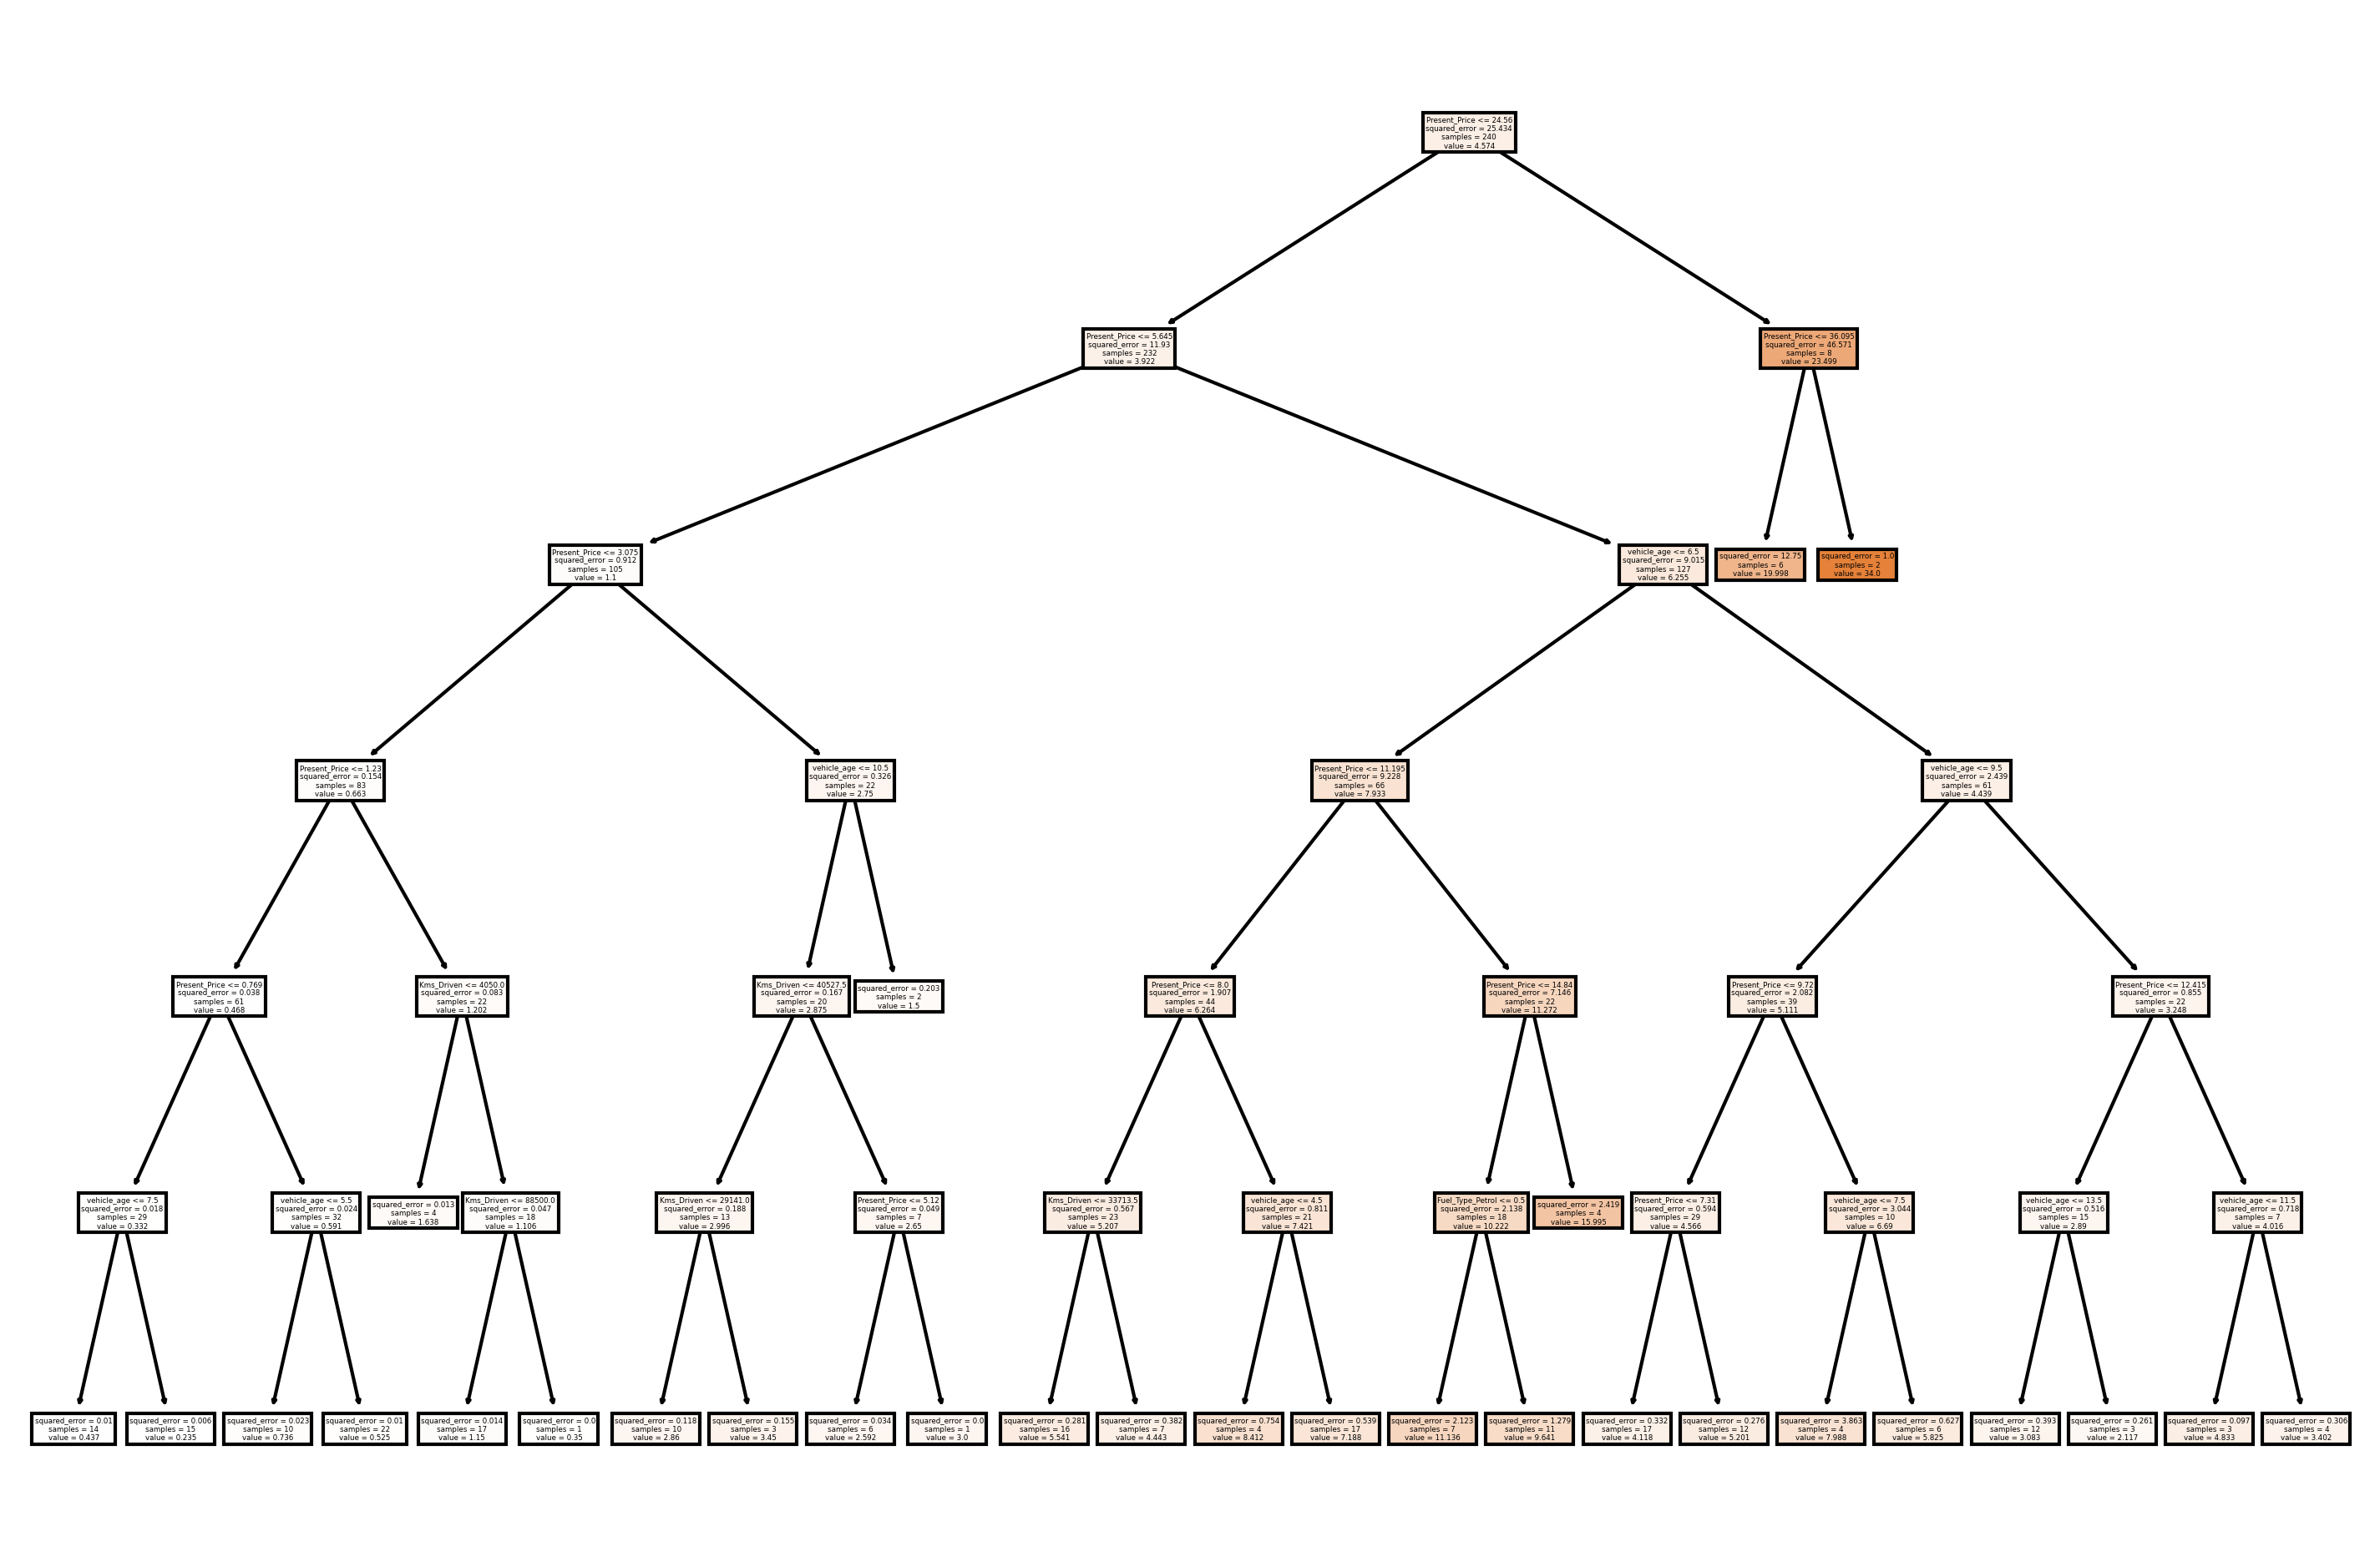

In [74]:
report_model(pruned_tree)

## GridSearch

In [75]:
from sklearn.model_selection import GridSearchCV

In [76]:
model = DecisionTreeRegressor(random_state=101)

In [77]:
param_grid = {"splitter":["best", "random"],
            "max_depth": [None, 4, 5, 6, 7,8,9,10],
              "min_samples_leaf": [1, 2, 3, 4, 5, 6,7],
             "min_samples_split": [2, 3, 5, 6, 7,8,9]}

In [78]:

grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [79]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=101),
             n_jobs=-1,
             param_grid={'max_depth': [None, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 3, 5, 6, 7, 8, 9],
                         'splitter': ['best', 'random']},
             scoring='neg_root_mean_squared_error')

In [80]:
grid_model.best_estimator_

DecisionTreeRegressor(max_depth=6, min_samples_split=7, random_state=101)

In [81]:
grid_model.best_params_

{'max_depth': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 7,
 'splitter': 'best'}

In [82]:
grid_score =pd.DataFrame(grid_model.cv_results_)
grid_score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_splitter,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008893,0.001867,0.004340,0.000922,None,1,2,best,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",-0.884873,...,-0.768519,-3.661578,-0.855804,-2.462645,-1.135945,-1.340881,-0.923418,-1.470383,0.869760,9
1,0.007649,0.002021,0.006893,0.004487,None,1,2,random,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",-0.923490,...,-1.591926,-2.145708,-1.001497,-3.557253,-0.841655,-0.398649,-6.202618,-2.095056,1.733007,431
2,0.009438,0.002714,0.005520,0.002180,None,1,3,best,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",-0.868025,...,-0.764768,-3.669531,-0.893783,-2.493841,-1.150770,-1.381815,-0.907673,-1.485144,0.871849,12
3,0.007966,0.002464,0.004738,0.001255,None,1,3,random,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",-6.897430,...,-1.125360,-2.567831,-2.175479,-3.904847,-0.828821,-0.997053,-4.238386,-2.658377,1.817077,711
4,0.008101,0.003323,0.005910,0.003232,None,1,5,best,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",-0.784587,...,-0.744268,-3.660894,-0.962344,-2.662130,-1.065130,-1.322418,-0.917490,-1.528818,0.922420,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,0.005428,0.000867,0.004129,0.001474,10,7,7,random,"{'max_depth': 10, 'min_samples_leaf': 7, 'min_...",-2.497700,...,-1.853690,-1.457756,-1.613118,-3.192667,-1.689879,-1.381003,-4.204188,-2.438993,1.091379,651
780,0.003717,0.001025,0.002356,0.000644,10,7,8,best,"{'max_depth': 10, 'min_samples_leaf': 7, 'min_...",-1.136134,...,-1.138282,-0.839436,-1.350820,-2.628755,-4.944650,-1.265750,-2.826622,-1.904412,1.203141,187
781,0.004758,0.001054,0.003091,0.000882,10,7,8,random,"{'max_depth': 10, 'min_samples_leaf': 7, 'min_...",-2.497700,...,-1.853690,-1.457756,-1.613118,-3.192667,-1.689879,-1.381003,-4.204188,-2.438993,1.091379,651
782,0.004416,0.001508,0.002724,0.000880,10,7,9,best,"{'max_depth': 10, 'min_samples_leaf': 7, 'min_...",-1.136134,...,-1.138282,-0.839436,-1.350820,-2.628755,-4.944650,-1.265750,-2.826622,-1.904412,1.203141,187


In [83]:
grid_model.best_index_

302

In [84]:
grid_model.best_score_

-1.4096661789372227

In [85]:
y_train_pred = grid_model.predict(X_train)

In [86]:
y_pred = grid_model.predict(X_test)

In [87]:
train_val(y_train, y_train_pred, y_test, y_pred)

,train_set,test_set
R2,0.971356,0.930021
mae,0.481615,0.738078
mse,0.728537,1.878304
rmse,0.853544,1.370512


In [88]:
from sklearn.model_selection import cross_validate, cross_val_score
model = DecisionTreeRegressor(random_state=101,max_depth = 6, min_samples_split= 2)
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)
pd.DataFrame(scores)

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
0,0.007790,0.003697,0.959892,-0.538898,-0.463179,-0.680573
1,0.003392,0.006865,0.886540,-0.749800,-1.240498,-1.113776
2,0.015408,0.010089,0.916076,-0.938230,-2.740365,-1.655405
3,0.011778,0.009993,0.944924,-0.542735,-0.684456,-0.827319
4,0.008979,0.003607,0.659354,-1.476792,-11.481774,-3.388477
5,0.004503,0.003074,0.963601,-0.458411,-0.526473,-0.725585
6,0.005610,0.004790,0.893041,-1.243723,-6.330184,-2.515986
7,0.003477,0.004663,0.870195,-0.645394,-1.092579,-1.045265
8,0.003785,0.004348,0.887375,-0.577041,-1.373038,-1.171767
9,0.004393,0.005312,0.978598,-0.675981,-1.061438,-1.030261


In [89]:
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                             0.895960
test_neg_mean_absolute_error       -0.784700
test_neg_mean_squared_error        -2.699398
test_neg_root_mean_squared_error   -1.415441
dtype: float64

In [90]:
train_val(y_train, y_train_pred, y_test, y_pred)

,train_set,test_set
R2,0.971356,0.930021
mae,0.481615,0.738078
mse,0.728537,1.878304
rmse,0.853544,1.370512


In [91]:
my_dict = { 'Actual': y_test, 'Pred': y_pred, 'Residual': y_test-y_pred }
compare = pd.DataFrame(my_dict)

In [92]:
comp_sample = compare.sample(20)
comp_sample

,Actual,Pred,Residual
194,0.20,0.525455,-0.325455
219,4.50,5.200833,-0.700833
216,2.90,2.860000,0.040000
39,2.25,2.116667,0.133333
178,0.35,0.437143,-0.087143
268,4.80,5.540625,-0.740625
265,6.50,8.412500,-1.912500
119,1.05,1.150000,-0.100000
98,7.05,5.825000,1.225000
49,7.75,8.412500,-0.662500


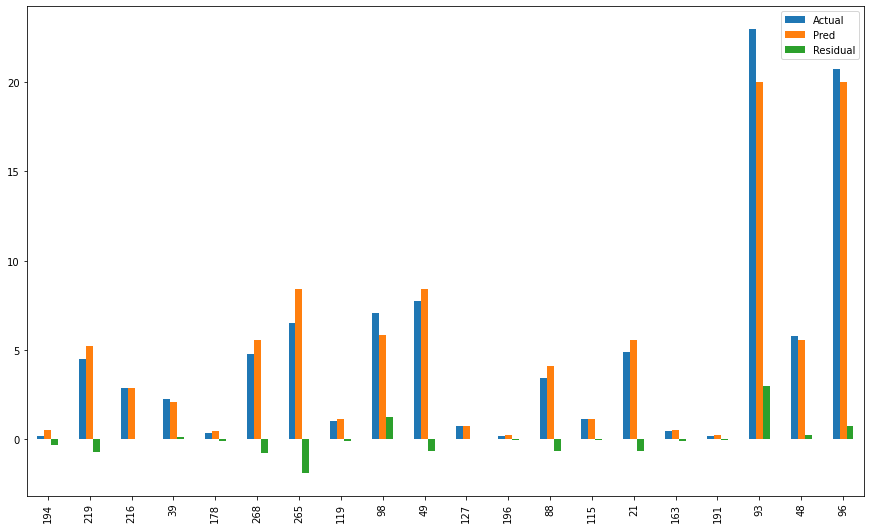

In [93]:
comp_sample.plot(kind='bar',figsize=(15,9))
plt.show()